# changing_inputs

This Notebook loads an input file, changes the inputs and for each change runs the sap2012 model.

## Setup

In [1]:
%matplotlib inline
import sap2012
import matplotlib.pyplot as plt
s=sap2012.Sap2012()

## Read input file

In [2]:
fp='input_csv_file.csv'
s.read_input_csv(fp)

Exception: column 107 key solar_flux_north not in self.inputs dictionary 

## Change input and run model

The original `area` input value is:

In [13]:
s.inputs['temperature_during_heating_living_room']

21.0

Here this is changed to the three possible options below:

In [14]:
temperature_during_heating_living_room=[19,20,21,22,23]

For each area, the SAP model is run and the results stored in the `outputs` dictionary:

In [15]:
outputs={}
for i,a in enumerate(efficiency_of_main_space_heating_system_1):
    s.inputs['temperature_during_heating_living_room']=a
    s.run()
    outputs['run%s' % str(i+1)]=s.outputs.copy() # needs copy otherwise the same object is placed in all dictionary items

## Plot results

In [16]:
total_energy_used=[v['total_energy_used'] for v in outputs.values()]
total_energy_used

[15091.103822144398,
 16740.941986807687,
 18415.64889127628,
 20113.342255696716,
 21828.903050451212]

In [17]:
total_CO2_emissions_yearlys=[v['total_CO2_emissions_yearly'] for v in outputs.values()]
total_CO2_emissions_yearlys

[3676.469707258048,
 4032.834750825319,
 4394.571442190535,
 4761.27320890535,
 5131.83434057232]

Text(0, 0.5, 'total_energy_used')

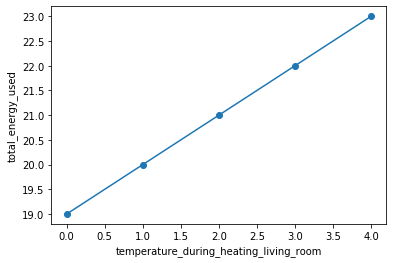

In [18]:
fig, ax = plt.subplots()  
ax.plot(temperature_during_heating_living_room,'-o')
ax.set_xlabel('temperature_during_heating_living_room')
ax.set_ylabel('total_energy_used')